In [2]:
import sqlalchemy
print(sqlalchemy.__version__)

2.0.40


In [3]:
# Directly use sqlite3 and pandas (works with any SQLAlchemy version)
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a connection to the database
conn = sqlite3.connect('fx_trading.db')

# Test the connection with a simple query
df = pd.read_sql_query("SELECT * FROM fx_rates LIMIT 5", conn)
display(df)

,date,pair,close,open,high,low,volume
0,2024-03-27 22:27:13.553289,EUR/USD,1.080000,1.080453,1.080077,1.079354,1.152070e+06
1,2024-03-28 22:27:13.553289,EUR/USD,1.072293,1.071995,1.072518,1.071163,4.138003e+06
2,2024-03-29 22:27:13.553289,EUR/USD,1.075696,1.074409,1.077451,1.074247,2.237407e+06
3,2024-03-30 22:27:13.553289,EUR/USD,1.080803,1.081080,1.080887,1.080097,2.247468e+06
4,2024-03-31 22:27:13.553289,EUR/USD,1.079037,1.078179,1.079886,1.078934,1.338515e+06


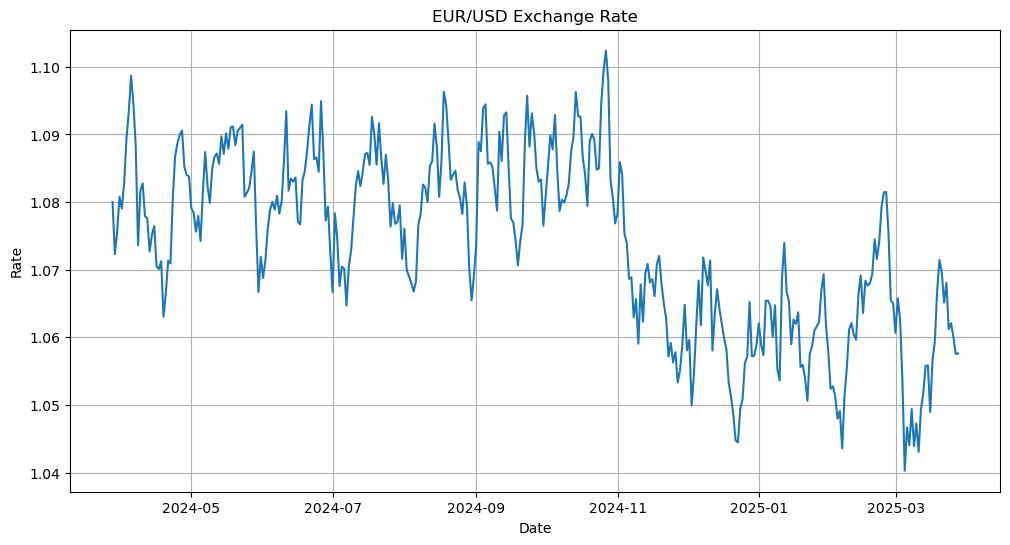

In [4]:
# Query EUR/USD data
eurusd_df = pd.read_sql_query(
    "SELECT date, close FROM fx_rates WHERE pair='EUR/USD' ORDER BY date", 
    conn
)

# Convert date column to datetime
eurusd_df['date'] = pd.to_datetime(eurusd_df['date'])

# Plot the exchange rate
plt.figure(figsize=(12, 6))
plt.plot(eurusd_df['date'], eurusd_df['close'])
plt.title('EUR/USD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

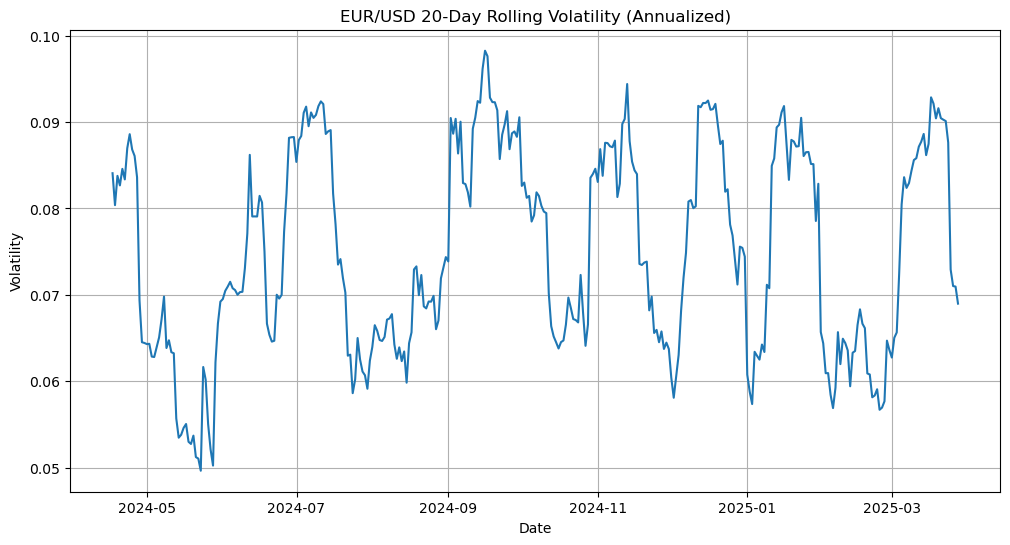

In [5]:
# Calculate daily returns
eurusd_df['return'] = eurusd_df['close'].pct_change()

# Calculate volatility (20-day rolling standard deviation)
eurusd_df['volatility'] = eurusd_df['return'].rolling(window=20).std() * np.sqrt(252)  # Annualized

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(eurusd_df['date'][20:], eurusd_df['volatility'][20:])
plt.title('EUR/USD 20-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

In [6]:
# Get data for multiple currency pairs
pairs = ['EUR/USD', 'GBP/USD', 'USD/JPY', 'AUD/USD']
correlation_data = {}

for pair in pairs:
    query = f"SELECT date, close FROM fx_rates WHERE pair='{pair}' ORDER BY date"
    pair_df = pd.read_sql_query(query, conn)
    pair_df['date'] = pd.to_datetime(pair_df['date'])
    correlation_data[pair] = pair_df.set_index('date')['close']

# Create a DataFrame with all pairs
correlation_df = pd.DataFrame(correlation_data)

# Calculate correlation matrix based on daily returns
correlation_matrix = correlation_df.pct_change().corr()

# Display the correlation matrix
display(correlation_matrix)

,EUR/USD,GBP/USD,USD/JPY,AUD/USD
EUR/USD,1.000000,0.093859,-0.007528,-0.089959
GBP/USD,0.093859,1.000000,0.009632,-0.009807
USD/JPY,-0.007528,0.009632,1.000000,0.109051
AUD/USD,-0.089959,-0.009807,0.109051,1.000000
